Rishika Endal(1002031323)

References

https://www.analyticsvidhya.com/blog/2021/04/improve-naive-bayes-text-classifier-using-laplace-smoothing/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.add.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
https://karthikvadloori.wixsite.com/home/post/text-classifier-ford-sentence-classification-using-nbc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Data Reading, Importing the Dataset

In [5]:
revdata = pd.read_csv('/content/gdrive/MyDrive/rt_reviews.csv', encoding='latin1')

#revdata['New_Sentence'] = revdata['New_Sentence'].str.lower()

Data Cleaning Steps

In [6]:

revdata.isnull().any()
revdata.dropna(how='any',inplace=True)
revdata.isnull().any()

Freshness    False
Review       False
dtype: bool

In [7]:
revdata = revdata.replace(["=",":",";","\+","\?", ">", "<","!", "#", "@", "\\\\", "$", ",", "%", "\*",
                             "\?", "\.", "\(", "\)", "\"", "\]", "\{", "\}","\[", "/br"], "", regex = True)
revdata = revdata.replace(["0","1","2","3","4","5","6","7","8","9","/","' "," "]," ",regex=True)

In [8]:
revdata.reset_index(inplace=True)
revdata.tail(30)

,index,Freshness,Review
479970,479970,rotten,Gordon Gekko is back but he's not as powerful...
479971,479971,rotten,Shot like an s BBC kids show Sugarman's Vin...
479972,479972,rotten,Too long too dark too confusing - and it shou...
479973,479973,rotten,The plot is a formulaic ditty where the cop u...
479974,479974,fresh,Apollo remains Howard's masterpiece It is ...
479975,479975,rotten,It's the role of an artist to not just commen...
479976,479976,rotten,If the point of the film is to somehow succee...
479977,479977,fresh,It all adds up to a charming celebration of t...
479978,479978,fresh,While no entry in the franchise has surpassed...
479979,479979,rotten,It leaves a big blank - make that two blanks ...


In [10]:
revdata.head(10)

,index,Freshness,Review
0,0,fresh,Manakamana doesn't answer any questions yet m...
1,1,fresh,Wilfully offensive and powered by a chest-thu...
2,2,rotten,It would be difficult to imagine material mor...
3,3,rotten,Despite the gusto its star brings to the role...
4,4,rotten,If there was a good idea at the core of this ...
5,5,rotten,Gleeson goes the Hallmark Channel route damag...
6,6,fresh,It was the height of satire in dark as h...
7,7,rotten,Everyone in The Comedian deserves a better mo...
8,8,rotten,Actor encourages grumpy Christians to embrace...
9,9,fresh,Slight contained but ineffably soulful


## Train,Test,Validation Splitting of the Data
####We have utilized sklearn to split the data

*   We have choosen the split to be '0.3' with test_data '0.15' and validation '0.15' in order to minimize the variance between the interdependent priors.



In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data =  train_test_split(revdata, test_size=0.3, random_state=1)


In [12]:
print("Size of Train Data: ", len(train_data.index))
print("Size of Test Data: ", len(test_data.index))

Size of Train Data:  336000
Size of Test Data:  144000


In [13]:
test_data, valid = train_test_split(test_data, test_size=0.5, random_state=1)


print("Size of Test_after_valid Data: ", len(test_data.index))
print("Size of Validation Data: ", len(valid.index))

Size of Test_after_valid Data:  72000
Size of Validation Data:  72000


### Prior Probability Calculation:







In [14]:
ctype_cnt = train_data['Freshness'].value_counts()

prior_type = pd.DataFrame(ctype_cnt).transpose()
sumctype_cnt = np.sum(ctype_cnt)
prior_type = prior_type/sumctype_cnt

prior_type

,fresh,rotten
Freshness,0.500199,0.499801


In [15]:
train_data['Freshness'].value_counts()

fresh     168067
rotten    167933
Name: Freshness, dtype: int64

<Axes: >

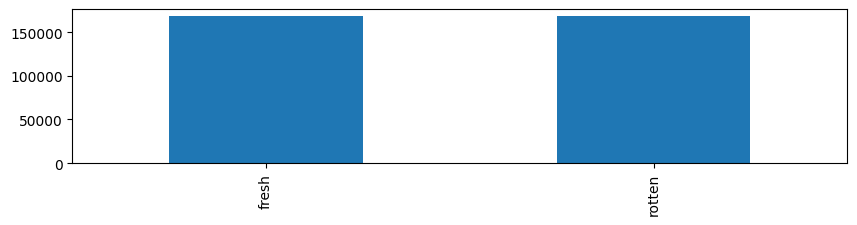

In [16]:
plt.figure(figsize=(10,2))
ctype_cnt.plot(kind='bar')


###  Bag of Words: Building a vocabulary for the NBC

In [ ]:
#We utilize only the words with a minimum occurence of 5 in this case

In [17]:
from collections import Counter as c


def wfreq(df,Type = "all",voclist=None,minwoccurence=5):
  
    if Type!="all":
        df = df[df["Freshness"]==Type]
    if bool(int(Type=="all")*int(voclist==None)):
        pass
    elif None==voclist:
        print("No vocabularity list is present.")

    voc1=[]

    print("Started")
    voc1=[s.split() for s in df["Review"]]
    voc1 = np.concatenate(voc1).flatten()

    print("Ended")
    print("Words in all the sentences:",len(voc1) )
    
    vocdic = c(voc1)

    if Type == "all":
        vocdic = {key:value for key, value in vocdic.items() if vocdic[key] >= 5}
    else:
        vocdic = {key:value for key, value in vocdic.items() if key in voclist}

    voc = list(vocdic.keys())
    print("Count of words: ",len(voc))
    
    return vocdic,voc

In [18]:
vocdic,voc=wfreq(train_data)

Started
Ended
Words in all the sentences: 7293549
Count of words:  44675


In [19]:
print(list(vocdic.items())[:10])
print(voc[:10])

[('Marshall', 185), ('proves', 1583), ('a', 232637), ('movie', 37972), ('can', 11845), ('be', 35684), ('entertaining', 4650), ('AND', 46), ('complicated', 562), ('A', 30447)]
['Marshall', 'proves', 'a', 'movie', 'can', 'be', 'entertaining', 'AND', 'complicated', 'A']


In [20]:
wfreqdf =pd.DataFrame(voc,columns=["Vocabulary"])
wfreqdf.head(10)

,Vocabulary
0,Marshall
1,proves
2,a
3,movie
4,can
5,be
6,entertaining
7,AND
8,complicated
9,A


## Building a Word Frequency table for every type of class in the dataset


*   We construct it to utilize for the likelihood in the NBC




In [21]:
for Type in ctype_cnt.index:

    print("\nType: {}".format(Type))
    vocdic_type,voc_type=wfreq(train_data,voclist = voc)
    voctypedf=pd.DataFrame(vocdic_type.items(),columns=["Vocabulary",Type])
    wfreqdf=wfreqdf.merge(voctypedf,how="left",on="Vocabulary")


Type: fresh
Started
Ended
Words in all the sentences: 7293549
Count of words:  44675

Type: rotten
Started
Ended
Words in all the sentences: 7293549
Count of words:  44675


In [23]:
wfreqdf.head(5)

,Vocabulary,fresh,rotten
0,Marshall,185,185
1,proves,1583,1583
2,a,232637,232637
3,movie,37972,37972
4,can,11845,11845


In [26]:
#Now finding the Likelihood P(Items|Class). That is, calculation of probability of a word given its type.

kt=True

if kt==False:
    likelihoodprob =wfreqdf.set_index("Vocabulary")
elif kt==True:
    likelihoodprob=wfreqdf.set_index("Vocabulary").fillna(0)+1
likelihoodprob = likelihoodprob.div(likelihoodprob.sum(axis=0),axis=1)
likelihoodprob

,fresh,rotten
Vocabulary,,
Marshall,2.591054e-05,2.591054e-05
proves,2.206575e-04,2.206575e-04
a,3.240739e-02,3.240739e-02
movie,5.289789e-03,5.289789e-03
can,1.650195e-03,1.650195e-03
...,...,...
drought,8.358237e-07,8.358237e-07
Mired,8.358237e-07,8.358237e-07
tolerating,8.358237e-07,8.358237e-07


## LaplacianSmoothing

In [33]:


st_likelihoodprob = (
     wfreqdf.set_index("Vocabulary")
    .fillna(0) 
    .add(1)
    if st==True
    else train_wfreqdf.set_index("Vocabulary")
)
sm_likelihoodprob

,fresh,rotten
Vocabulary,,
Marshall,186,186
proves,1584,1584
a,232638,232638
movie,37973,37973
can,11846,11846
...,...,...
drought,6,6
Mired,6,6
tolerating,6,6


Data Validation

K-Fold CV: 


*   Where, K=5





In [ ]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score

folds=5
#Number of folds = 5

foldsize=len(train_data)/folds
foldsize=int(foldsize) #Finding the fold length
print(foldsize)

for i in range(folds):

    if i is 0:
        cfoldval =train_data[0:foldsize]
        cfoldtrain_data = train_data[~train_data.isin(cfoldval)].dropna()
        #For the first iteration we consider the set to be the first 20% of the data.
        #Thus, we assign seperature block for the same, followed by change towards the next sets
        print('Train Data Size of this Fold:', len(cfoldtrain_data ))

    else: 
        cfoldval=train_data[foldsize * i : foldsize* (i+1)]
        cfoldtrain_data = train_data[~train_data.isin(cfoldval )].dropna()
        print('Train Data Size of this Fold:' ,len( cfoldtrain_data))

    ctype_cnt=cfoldtrain_data["Freshness"].value_counts()
    sumctype_cnt=np.sum(ctype_cnt)
    
    #Now we calculate the Prior Probability, P(Class)
    #For this we divide each class type count with the total count of all classes

    prior_type=pd.DataFrame(ctype_cnt).T
    prior_type=prior_type/sumctype_cnt
    
    vocdic,voc= wfreq(cfoldtrain_data)
    wfreqdf=pd.DataFrame(voc,columns=["Vocabulary"])
    Type=ctype_cnt.index
    j=0
    while Type[j] in ctype_cnt.index:
        vocdic_type,d=wfreq(cfoldtrain_data,voclist= voc)
        voctypedf = pd.DataFrame(vocdic_type.items(),columns=["Vocabulary",Type[j]])
        wfreqdf= wfreqdf.merge(voctypedf,how="left",on="Vocabulary" )
        j+=1
        if j==len(ctype_cnt.index):
          break
    st = True
    if st:
      likelihoodprob=wfreqdf.set_index("Vocabulary").fillna(0) + 1
    else:
      likelihoodprob =wfreqdf.set_index("Vocabulary")
    likelihoodprob = likelihoodprob.div(likelihoodprob.sum(axis=0),axis=1)
    

    foldprediction=[]
    for s in cfoldval["Review"]:
        valwrds = [w for w in s.split() if w in voc]
        valwrds_df =pd.DataFrame(valwrds,columns=["Vocabulary"])
        valwrds_df =valwrds_df.merge(likelihoodprob, how="inner",on="Vocabulary").set_index("Vocabulary")
        val_likelihoodprob =pd.DataFrame(valwrds_df.prod(axis=0),columns=["Probability"])
        val_prob =val_likelihoodprob.join(prior_type.T)
        val_prob["Fin_Probability"] = val_prob["Probability"]*val_prob["Freshness"]
        foldprediction.append(val_prob["Fin_Probability"].idxmax())
    accuracy=accuracy_score(cfoldval["Freshness"], foldprediction)
    print("Fold Level:",i+1," Detected Accuracy Rate:",accuracy)

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-22-906334df0941>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 0:


67200
Train Data Size of this Fold: 268800
Started
Ended
Words in all the sentences: 5835537
Count of words:  39935
Started
Ended
Words in all the sentences: 5835537
Count of words:  39935
Started
Ended
Words in all the sentences: 5835537
Count of words:  39935
Fold Level: 1  Detected Accuracy Rate: 0.4972916666666667
Train Data Size of this Fold: 268800
Started
Ended
Words in all the sentences: 5835485
Count of words:  39878
Started
Ended
Words in all the sentences: 5835485
Count of words:  39878
Started
Ended
Words in all the sentences: 5835485
Count of words:  39878
Fold Level: 2  Detected Accuracy Rate: 0.4963690476190476
Train Data Size of this Fold: 268800
Started
Ended
Words in all the sentences: 5832847
Count of words:  39930
Started
Ended
Words in all the sentences: 5832847
Count of words:  39930
Started
Ended
Words in all the sentences: 5832847
Count of words:  39930


In [ ]:
valid.head()

,index,Freshness,Review
47379,47379,rotten,Arrive two hours late for Bekmambetov's overc...
21093,21093,fresh,It's not one of those so-bad-it's-good or B-m...
164150,164150,fresh,Not for everyone in fact generally disrecomme...
10553,10553,rotten,it will no doubt find its boosters
460995,460995,rotten,While passable everything in Creed feels calc...


In [ ]:
validprediction = []

for s in valid["Review"]:
        valwrds = [w for w in s.split() if w in voc]
        valwrds_df =pd.DataFrame(valwrds,columns=["Vocabulary"])
        valwrds_df =valwrds_df.merge(likelihoodprob, how="inner",on="Vocabulary").set_index("Vocabulary")
        val_likelihoodprob =pd.DataFrame(valwrds_df.prod(axis=0),columns=["Probability"])
        val_prob =val_likelihoodprob.join(prior_type.transpose())
        val_prob["Fin_Probability"] = val_prob["Probability"]*val_prob["Freshness"]
        validprediction.append(val_prob["Fin_Probability"].idxmax())


print('Generated Accuracy for Valid Data: ',accuracy_score(valid["Freshness"], validprediction))

Generated Accuracy for Valid Data:  0.5016666666666667


In [ ]:
print(cr(validprediction, valid["Freshness"]))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       fresh       1.00      0.50      0.67     72000
      rotten       0.00      0.00      0.00         0

    accuracy                           0.50     72000
   macro avg       0.50      0.25      0.33     72000
weighted avg       1.00      0.50      0.67     72000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm(validprediction, valid["Freshness"])

array([[36120, 35880],
       [    0,     0]])

[]

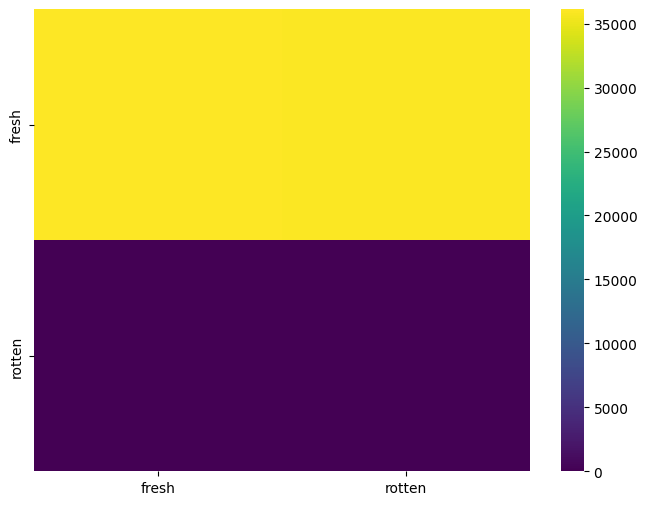

In [ ]:
conf_matrix =cm(validprediction, valid["Freshness"], labels=ctype_cnt.index)

import seaborn

plt.figure(figsize = (8,6))
seaborn.heatmap(pd.DataFrame(conf_matrix,columns=ctype_cnt.index,index=ctype_cnt.index),cmap="viridis").plot()

##Evaluating the accuracy for the test data split

In [ ]:
test_prediction=[]

for s in test_data["Review"]:
        testwrds = [w for w in s.split() if w in voc]
        testwrds_df =pd.DataFrame(testwrds,columns=["Vocabulary"])
        testwrds_df =testwrds_df.merge(likelihoodprob, how="inner",on="Vocabulary").set_index("Vocabulary")
        test_likelihoodprob =pd.DataFrame(testwrds_df.prod(axis=0),columns=["Probability"])
        test_prob =test_likelihoodprob.join(prior_type.transpose())
        test_prob["Fin_Probability"] = test_prob["Probability"]*test_prob["Freshness"]
        test_prediction.append(test_prob["Fin_Probability"].idxmax())

print('Generated Accuracy for Test Data: ',accuracy_score(test_data["Freshness"], test_prediction))

Generated Accuracy for Test Data:  0.4974027777777778


###Deriving Top 10 words that predicts each class

*   P(Class|Word) -> Posterior



In [ ]:
for i in range(len(Type)):\
  likelihoodprob.iloc[:,i:i+1]=likelihoodprob.iloc[:,i:i+1]*float(prior_type.iloc[:,i:i+1].iloc[0])

for i in range(len(Type)):
  print("\nThe Top 10 words that predict: {}".format(Type[i]))
  print(likelihoodprob.nlargest(10,Type[i]).index.tolist())


The Top 10 words that predict: fresh
['the', 'a', 'and', 'of', 'to', 'is', 'in', 'that', 'it', 'The']

The Top 10 words that predict: rotten
['the', 'a', 'and', 'of', 'to', 'is', 'in', 'that', 'it', 'The']
